In [ ]:
pip install pandas-datareader

In [ ]:
pip install cvxpy


In [ ]:
pip install yfinance

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Section 1: Importing Data and Calculating Summary Statistics






## Daily Returns






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to calculate adjusted return
def calculate_adjusted_return(df):
    df['return'] = df['Adj Close'].pct_change()
    return df['return']

# File paths for individual stock data
aapl_file_path = '/content/drive/MyDrive/Colab Notebooks/_441f639884b4449fdcc212a2d8ed1b7c_aapl.csv'
msft_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_msft.csv'
wfc_file_path = '/content/drive/MyDrive/Colab Notebooks/_d54e93ebdf2971e11509d23595ca6209_wfc.csv'
dis_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_dis.csv'
cop_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_cop.csv'
xom_file_path = '/content/drive/MyDrive/Colab Notebooks/_d54e93ebdf2971e11509d23595ca6209_xom.csv'
goog_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_goog.csv'
bidu_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_bidu.csv'
tsla_file_path = '/content/drive/MyDrive/Colab Notebooks/_d54e93ebdf2971e11509d23595ca6209_tsla.csv'
ttm_file_path = '/content/drive/MyDrive/Colab Notebooks/_d54e93ebdf2971e11509d23595ca6209_ttm.csv'

# File path for DJI data
dji_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_dji.csv'

#File path for AAPL Monthly data
aapl_monthly_file_path = '/content/drive/MyDrive/Colab Notebooks/_58217c10deb55d59805ab8050cd390de_aapl_monthly-_2_.csv'


# Read the individual stock data and calculate adjusted return for each stock
df_aapl = pd.read_csv(aapl_file_path, index_col='Date', parse_dates=True)
df_aapl['AAPL'] = calculate_adjusted_return(df_aapl)

df_msft = pd.read_csv(msft_file_path, index_col='Date', parse_dates=True)
df_msft['MSFT'] = calculate_adjusted_return(df_msft)

df_wfc = pd.read_csv(wfc_file_path, index_col='Date', parse_dates=True)
df_wfc['WFC'] = calculate_adjusted_return(df_wfc)

df_dis = pd.read_csv(dis_file_path, index_col='Date', parse_dates=True)
df_dis['DIS'] = calculate_adjusted_return(df_dis)

df_cop = pd.read_csv(cop_file_path, index_col='Date', parse_dates=True)
df_cop['COP'] = calculate_adjusted_return(df_cop)

df_xom = pd.read_csv(xom_file_path, index_col='Date', parse_dates=True)
df_xom['XOM'] = calculate_adjusted_return(df_xom)

df_goog = pd.read_csv(goog_file_path, index_col='Date', parse_dates=True)
df_goog['GOOG'] = calculate_adjusted_return(df_goog)

df_bidu = pd.read_csv(bidu_file_path, index_col='Date', parse_dates=True)
df_bidu['BIDU'] = calculate_adjusted_return(df_bidu)

df_tsla = pd.read_csv(tsla_file_path, index_col='Date', parse_dates=True)
df_tsla['TSLA'] = calculate_adjusted_return(df_tsla)

df_ttm = pd.read_csv(ttm_file_path, index_col='Date', parse_dates=True)
df_ttm['TTM'] = calculate_adjusted_return(df_ttm)

df_dji = pd.read_csv(dji_file_path, index_col='Date', parse_dates=True)
df_dji['DJI'] = calculate_adjusted_return(df_dji)

# Combine all the DataFrames into a single DataFrame, returns_df
returns_df = pd.DataFrame(index=df_aapl.index)
returns_df['Date'] = df_aapl.index
returns_df['AAPL'] = df_aapl['AAPL']
returns_df['MSFT'] = df_msft['MSFT']
returns_df['WFC'] = df_wfc['WFC']
returns_df['DIS'] = df_dis['DIS']
returns_df['COP'] = df_cop['COP']
returns_df['XOM'] = df_xom['XOM']
returns_df['GOOG'] = df_goog['GOOG']
returns_df['BIDU'] = df_bidu['BIDU']
returns_df['TSLA'] = df_tsla['TSLA']
returns_df['TTM'] = df_ttm['TTM']
returns_df['DJI'] = df_dji['DJI']

# Print the DataFrame with date and adjusted returns for all stocks
print("Adj Daily Returns")
print(returns_df)








Adj Daily Returns
                 Date      AAPL      MSFT       WFC       DIS       COP  \
Date                                                                      
2010-06-30 2010-06-30       NaN       NaN       NaN       NaN       NaN   
2010-07-01 2010-07-01 -0.012126  0.006519 -0.016406 -0.000317 -0.004482   
2010-07-02 2010-07-02 -0.006198  0.004750 -0.011914 -0.003493 -0.001023   
2010-07-06 2010-07-06  0.006844  0.023636  0.010852  0.010835  0.007784   
2010-07-07 2010-07-07  0.040381  0.020151  0.060040  0.044767  0.039838   
...               ...       ...       ...       ...       ...       ...   
2016-06-24 2016-06-24 -0.028096 -0.040069 -0.045919 -0.033327 -0.053912   
2016-06-27 2016-06-27 -0.014561 -0.028096 -0.015314 -0.013999 -0.055363   
2016-06-28 2016-06-28  0.016840  0.020855  0.024217  0.017694  0.028691   
2016-06-29 2016-06-29  0.008655  0.022249  0.018872  0.009682  0.046722   
2016-06-30 2016-06-30  0.012712  0.012465  0.007664  0.008662 -0.007060   

      




## Summary Statistics




In [4]:
# Calculate the summary statistics for the daily returns
daily_returns_summary = returns_df.describe()

# Calculate Sharpe Ratio assuming risk-free rate = 0
risk_free_rate = 0
daily_risk_free_rate = risk_free_rate / 252  # Assuming 252 trading days in a year
daily_sharpe_ratio = (daily_returns_summary.loc['mean'] - daily_risk_free_rate) / daily_returns_summary.loc['std']

# Add Sharpe Ratio to the summary DataFrame
daily_returns_summary.loc['Sharpe Ratio'] = daily_sharpe_ratio

# Print the summary statistics
print("Summary Statistics for Adj Daily Returns")
print(daily_returns_summary)

Summary Statistics for Adj Daily Returns
                     AAPL         MSFT          WFC          DIS          COP  \
count         1511.000000  1511.000000  1511.000000  1511.000000  1511.000000   
mean             0.000839     0.000747     0.000626     0.000898     0.000403   
std              0.016516     0.014818     0.015646     0.013734     0.016763   
min             -0.123558    -0.113995    -0.090440    -0.091708    -0.092116   
25%             -0.007660    -0.007404    -0.007497    -0.006015    -0.008121   
50%              0.000635     0.000181     0.000296     0.001244     0.000447   
75%              0.010368     0.008479     0.008585     0.008263     0.009051   
max              0.088741     0.104522     0.080680     0.076302     0.066390   
Sharpe Ratio     0.050817     0.050408     0.039981     0.065366     0.024030   

                      XOM         GOOG         BIDU         TSLA          TTM  \
count         1511.000000  1511.000000  1511.000000  1511.000000  1



---


# Section 2: Efficient Frontier and Optimal Portfolio Allocation


---



-
## MSFT and WFC Portfolio




### Efficient Frontier (Approximate Weights)

Efficient Frontier:
    Weight_MSFT  Weight_WFC    Return   Std_Dev  Sharpe_Ratio
0          0.00        1.00  0.000626  0.015646      0.039981
1          0.05        0.95  0.000632  0.015242      0.041440
2          0.10        0.90  0.000638  0.014866      0.042896
3          0.15        0.85  0.000644  0.014521      0.044332
4          0.20        0.80  0.000650  0.014210      0.045730
5          0.25        0.75  0.000656  0.013934      0.047071
6          0.30        0.70  0.000662  0.013696      0.048333
7          0.35        0.65  0.000668  0.013497      0.049493
8          0.40        0.60  0.000674  0.013340      0.050531
9          0.45        0.55  0.000680  0.013226      0.051426
10         0.50        0.50  0.000686  0.013156      0.052162
11         0.55        0.45  0.000692  0.013130      0.052726
12         0.60        0.40  0.000698  0.013150      0.053109
13         0.65        0.35  0.000704  0.013214      0.053310
14         0.70        0.30  0.000711  0.013323   

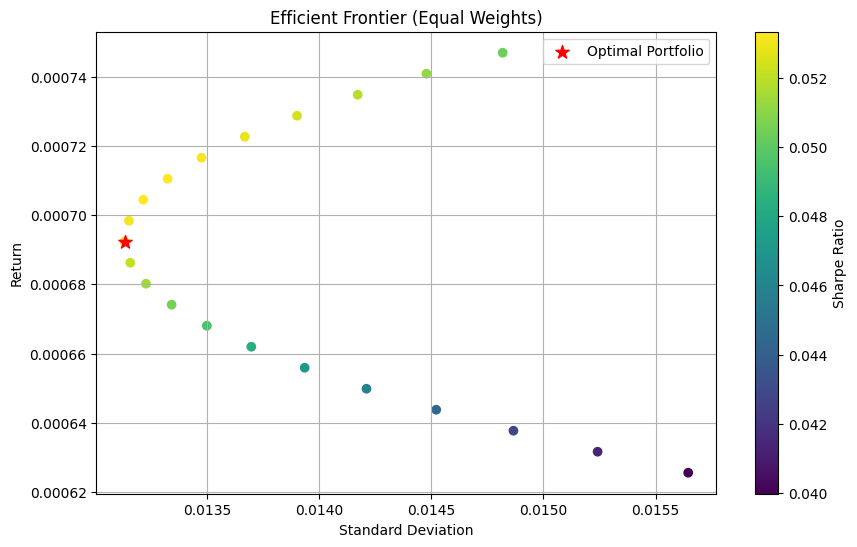

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty DataFrame to store the efficient frontier data
portfolio_df = pd.DataFrame(columns=['Weight_MSFT', 'Weight_WFC', 'Return', 'Std_Dev', 'Sharpe_Ratio'])

# Calculate the efficient frontier
weights = np.arange(0, 1.05, 0.05)  # 0%, 5%, ..., 100%
for w_msft in weights:
    w_wfc = 1 - w_msft
    portfolio_return = (returns_df['MSFT'] * w_msft + returns_df['WFC'] * w_wfc).mean()
    portfolio_std_dev = (returns_df['MSFT'] * w_msft + returns_df['WFC'] * w_wfc).std() * np.sqrt(1)
    portfolio_sharpe_ratio = (portfolio_return - 0) / portfolio_std_dev
    portfolio_df = pd.concat([portfolio_df, pd.DataFrame({
        'Weight_MSFT': [w_msft],
        'Weight_WFC': [w_wfc],
        'Return': [portfolio_return],
        'Std_Dev': [portfolio_std_dev],
        'Sharpe_Ratio': [portfolio_sharpe_ratio]
    })], ignore_index=True)

# Find the row with the minimum standard deviation (lowest variance)
optimal_portfolio = portfolio_df.iloc[portfolio_df['Std_Dev'].idxmin()]

# Print the efficient frontier DataFrame and the optimal portfolio allocation
print("Efficient Frontier:")
print(portfolio_df)
print("\nOptimal Portfolio Allocation:")
print(optimal_portfolio)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Std_Dev'], portfolio_df['Return'], c=portfolio_df['Sharpe_Ratio'], marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio['Std_Dev'], optimal_portfolio['Return'], color='red', marker='*', s=100, label='Optimal Portfolio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()



### Optimal Portfolio Allocation (Minimum Variance)


Efficient Frontier:
      Weight_MSFT  Weight_WFC    Return   Std_Dev
0        0.550441    0.449559  0.000692  0.013130
1        0.164943    0.835057  0.000646  0.014425
2        0.380085    0.619915  0.000672  0.013398
3        0.481123    0.518877  0.000684  0.013177
4        0.945436    0.054564  0.000740  0.014448
...           ...         ...       ...       ...
9995     0.307521    0.692479  0.000663  0.013664
9996     0.471375    0.528625  0.000683  0.013191
9997     0.109268    0.890732  0.000639  0.014800
9998     0.962902    0.037098  0.000742  0.014562
9999     0.755058    0.244942  0.000717  0.013492

[10000 rows x 4 columns]

Optimal Portfolio Allocation:
Weight_MSFT    0.553384
Weight_WFC     0.446616
Return         0.000693
Std_Dev        0.013130
Name: 8196, dtype: float64


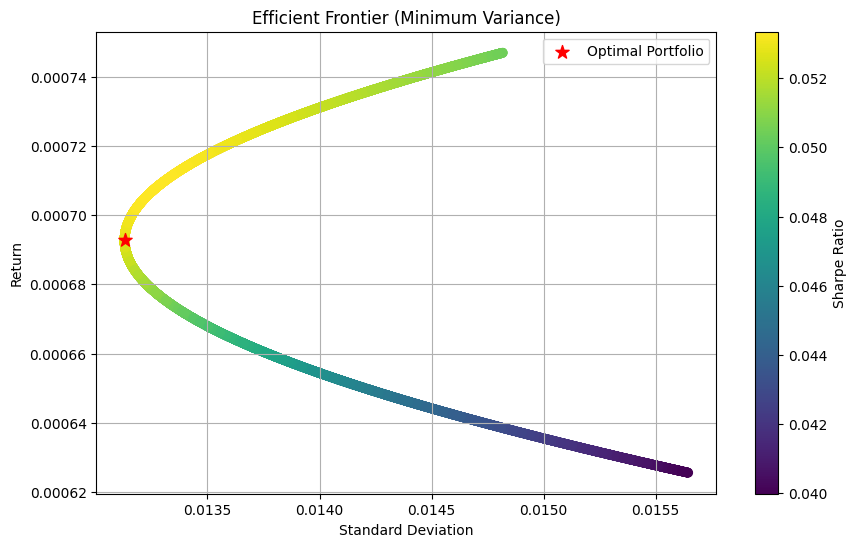

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty list to store the efficient frontier data
portfolio_list = []

# Calculate the efficient frontier using Monte Carlo simulation
num_portfolios = 10000
for _ in range(num_portfolios):
    # Generate random portfolio weights for MSFT and WFC (between 0 and 1)
    w_msft = np.random.random()
    w_wfc = 1 - w_msft

    # Calculate portfolio return and standard deviation
    portfolio_return = (returns_df['MSFT'] * w_msft + returns_df['WFC'] * w_wfc).mean()
    portfolio_std_dev = (returns_df['MSFT'] * w_msft + returns_df['WFC'] * w_wfc).std() * np.sqrt(1)

    # Append the results as a dictionary to the list
    portfolio_list.append({
        'Weight_MSFT': w_msft,
        'Weight_WFC': w_wfc,
        'Return': portfolio_return,
        'Std_Dev': portfolio_std_dev,
    })

# Convert the list of dictionaries into a DataFrame
portfolio_df = pd.DataFrame(portfolio_list)

# Find the row with the minimum standard deviation (lowest variance) for the tangency portfolio
optimal_portfolio = portfolio_df.iloc[portfolio_df['Std_Dev'].idxmin()]

# Print the efficient frontier DataFrame and the optimal portfolio allocation
print("Efficient Frontier:")
print(portfolio_df)
print("\nOptimal Portfolio Allocation:")
print(optimal_portfolio)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Std_Dev'], portfolio_df['Return'], c=portfolio_df['Return'] / portfolio_df['Std_Dev'], marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio['Std_Dev'], optimal_portfolio['Return'], color='red', marker='*', s=100, label='Optimal Portfolio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Efficient Frontier (Minimum Variance)')
plt.legend()
plt.grid(True)
plt.show()



### Optimal Risky Portfolio (Maximum Sharpe Ratio)




Optimal Portfolio Allocation (Tangency Portfolio):
MSFT weight: 0.6810947366661741
WFC weight: 0.3189052633338259
Return: 0.0007082242381175002
Std_Dev: 0.013276401288922407
Sharpe Ratio: 0.05334459411892212


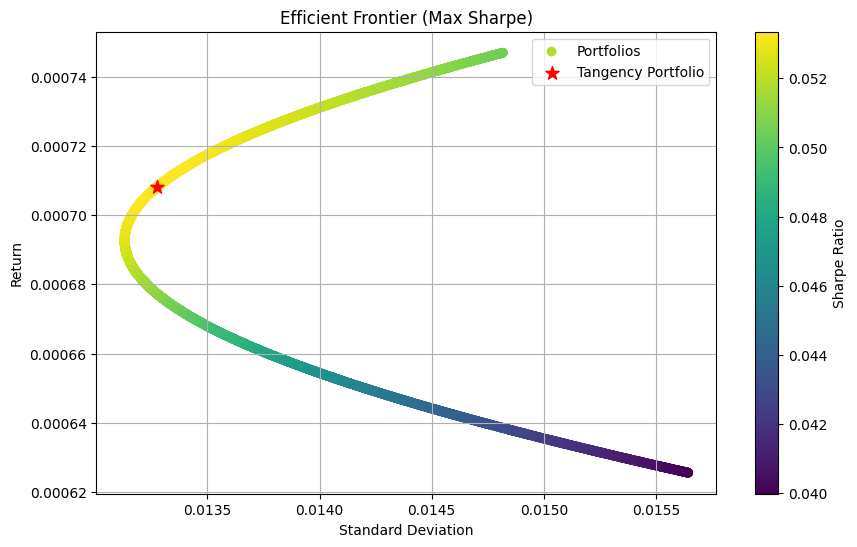

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate adjusted return
def calculate_adjusted_return(df):
    df['return'] = df['Adj Close'].pct_change()
    return df['return']

# File paths for individual stock data
msft_file_path = '/content/drive/MyDrive/Colab Notebooks/_c6159646c4566d0145fba7a91f251330_msft.csv'
wfc_file_path = '/content/drive/MyDrive/Colab Notebooks/_d54e93ebdf2971e11509d23595ca6209_wfc.csv'

# Read the individual stock data and calculate adjusted return for each stock
df_msft = pd.read_csv(msft_file_path, index_col='Date', parse_dates=True)
df_msft['MSFT'] = calculate_adjusted_return(df_msft)

df_wfc = pd.read_csv(wfc_file_path, index_col='Date', parse_dates=True)
df_wfc['WFC'] = calculate_adjusted_return(df_wfc)

# Combine MSFT and WFC DataFrames into a single DataFrame, returns2_df
returns2_df = pd.DataFrame(index=df_msft.index)
returns2_df['MSFT'] = df_msft['MSFT']
returns2_df['WFC'] = df_wfc['WFC']

# Calculate the summary statistics for the daily returns
daily_returns_summary = returns2_df.describe()

# Risk-free rate (Assuming it to be 0)
risk_free_rate = 0

# Number of Monte Carlo simulations
num_simulations = 10000

# Array to store results of Monte Carlo simulations
results = np.zeros((5, num_simulations))  # 5 rows: Weight_MSFT, Weight_WFC, Return, Std_Dev, Sharpe_Ratio

# Perform Monte Carlo simulation to generate random portfolios
for i in range(num_simulations):
    # Generate random portfolio weights (sum to 1)
    weights = np.random.random(2)
    weights /= np.sum(weights)

    # Calculate portfolio return and standard deviation
    portfolio_return = np.sum(weights * returns2_df.mean())
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns2_df.cov(), weights)))

    # Calculate Sharpe Ratio (Assuming risk-free rate = 0)
    sharpe_ratio_value = (portfolio_return - risk_free_rate) / portfolio_std_dev

    # Store results in the array
    results[0, i] = weights[0]  # MSFT weight
    results[1, i] = weights[1]  # WFC weight
    results[2, i] = portfolio_return
    results[3, i] = portfolio_std_dev
    results[4, i] = sharpe_ratio_value

# Find the row with the maximum Sharpe Ratio (tangency portfolio)
optimal_portfolio = results[:, results[4].argmax()]

# Print the optimal portfolio allocation
print("Optimal Portfolio Allocation (Tangency Portfolio):")
print("MSFT weight:", optimal_portfolio[0])
print("WFC weight:", optimal_portfolio[1])
print("Return:", optimal_portfolio[2])
print("Std_Dev:", optimal_portfolio[3])
print("Sharpe Ratio:", optimal_portfolio[4])

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[3], results[2], c=results[4], marker='o', cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio[3], optimal_portfolio[2], color='red', marker='*', s=100, label='Tangency Portfolio')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Efficient Frontier (Max Sharpe)')
plt.legend()
plt.grid(True)
plt.show()


## 10 Securities Portfolio


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

# Check the column names in returns_df
print("returns_df")
print(returns_df.columns)
#Drop the DJI column and name the new dataframe returns3_df
returns3_df = returns_df.drop('DJI', axis=1)
print("returns3_df")
#Check columns names in returns3_df
print(returns3_df.columns)

returns3_df.head()

returns_df
Index(['Date', 'AAPL', 'MSFT', 'WFC', 'DIS', 'COP', 'XOM', 'GOOG', 'BIDU',
       'TSLA', 'TTM', 'DJI'],
      dtype='object')
returns3_df
Index(['Date', 'AAPL', 'MSFT', 'WFC', 'DIS', 'COP', 'XOM', 'GOOG', 'BIDU',
       'TSLA', 'TTM'],
      dtype='object')


,Date,AAPL,MSFT,WFC,DIS,COP,XOM,GOOG,BIDU,TSLA,TTM
Date,,,,,,,,,,,
2010-06-30,2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,2010-07-01,-0.012126,0.006519,-0.016406,-0.000317,-0.004482,-0.008060,-0.012271,0.006904,-0.078473,0.011053
2010-07-02,2010-07-02,-0.006198,0.004750,-0.011914,-0.003493,-0.001023,-0.000707,-0.006690,-0.014588,-0.125683,-0.012658
2010-07-06,2010-07-06,0.006844,0.023636,0.010852,0.010835,0.007784,0.015733,-0.001099,-0.001480,-0.160937,0.006410
2010-07-07,2010-07-07,0.040381,0.020151,0.060040,0.044767,0.039838,0.016881,0.032403,0.072943,-0.019243,0.001737


### Equal Allocation Portfolio

Optimal Portfolio Allocation (Equal Weight Portfolio):
AAPL weight: 0.1
MSFT weight: 0.1
WFC weight: 0.1
DIS weight: 0.1
COP weight: 0.1
XOM weight: 0.1
GOOG weight: 0.1
BIDU weight: 0.1
TSLA weight: 0.1
TTM weight: 0.1
Return: 0.0008642041301681559
Std_Dev: 0.012295232622781677


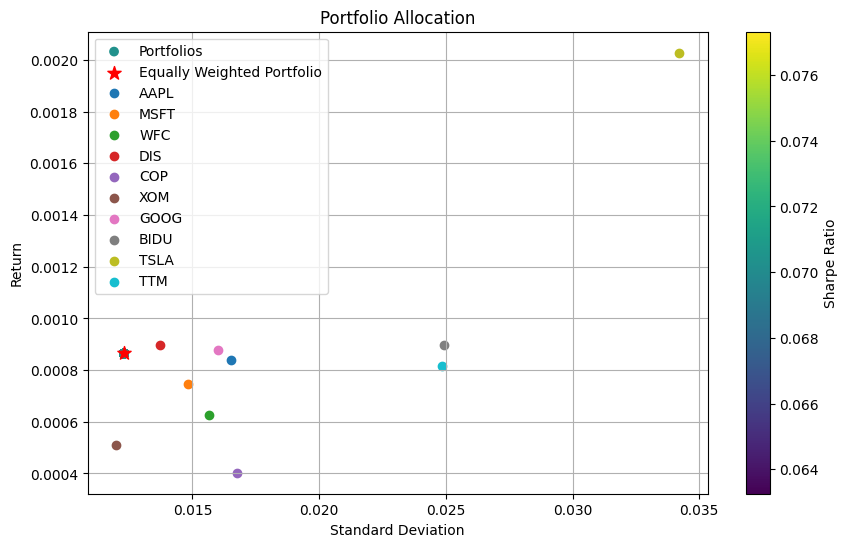

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming 'Date' is already set as the index. If not, you can set it using:
# returns3_df.set_index('Date', inplace=True)

# Drop the 'DJI' column from returns3_df (if not already dropped)
returns3_df.drop(columns='DJI', inplace=True, errors='ignore')

# Drop the 'Date' column from returns3_df (if not already dropped)
returns3_df.drop(columns='Date', inplace=True, errors='ignore')

# Calculate the summary statistics for the daily returns
daily_mean_returns = returns3_df.mean()
daily_cov_matrix = returns3_df.cov()

# Risk-free rate (Assuming it to be 0)
risk_free_rate = 0

# Number of Monte Carlo simulations
num_simulations = 10000

# Array to store results of Monte Carlo simulations
results = np.zeros((len(returns3_df.columns) + 2, num_simulations))  # rows: weights, Return, Std_Dev

# Perform Monte Carlo simulation to generate random portfolios
for i in range(num_simulations):
    # Generate equal portfolio weights (10% allocation to each stock)
    weights = np.full(len(returns3_df.columns), 0.1)

    # Calculate portfolio return and standard deviation
    portfolio_return = np.sum(weights * daily_mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(daily_cov_matrix, weights)))

    # Store results in the array
    results[:-2, i] = weights
    results[-2, i] = portfolio_return
    results[-1, i] = portfolio_std_dev

# Find the row with the maximum Sharpe Ratio (tangency portfolio)
optimal_portfolio_index = np.argmax(results[-2] / results[-1])

# Extract the optimal portfolio allocation
optimal_weights = results[:-2, optimal_portfolio_index]
optimal_return = results[-2, optimal_portfolio_index]
optimal_std_dev = results[-1, optimal_portfolio_index]

# Print the optimal portfolio allocation
print("Optimal Portfolio Allocation (Equal Weight Portfolio):")
for stock, weight in zip(returns3_df.columns, optimal_weights):
    print(f"{stock} weight:", weight)
print("Return:", optimal_return)
print("Std_Dev:", optimal_std_dev)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[-1], results[-2], c=results[-2] / results[-1], marker='o', cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_std_dev, optimal_return, color='red', marker='*', s=100, label='Equally Weighted Portfolio')
for stock, weight in zip(returns3_df.columns, optimal_weights):
    plt.scatter(daily_cov_matrix[stock][stock] ** 0.5, daily_mean_returns[stock], label=stock)
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Portfolio Allocation')
plt.legend()
plt.grid(True)
plt.show()


### Optimal Portfolio (Long Only)


Optimal Portfolio Allocation (Long-Only Portfolio):
AAPL weight: 0.16891
MSFT weight: 0.10018
WFC weight: 0.00000
DIS weight: 0.38830
COP weight: 0.00000
XOM weight: 0.00000
GOOG weight: 0.17498
BIDU weight: 0.00000
TSLA weight: 0.16763
TTM weight: 0.00000
Return: 0.00106
Std_Dev: 0.01258
Sharpe Ratio: 0.08416


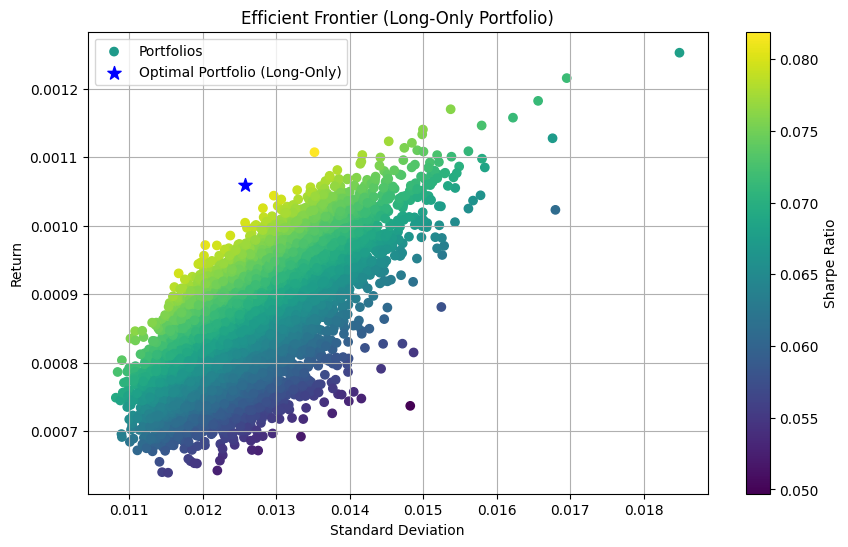

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming you have already loaded the 'returns3_df' DataFrame with daily returns

# Drop the duplicate 'Date' column from returns3_df (if not already dropped)
returns3_df.drop(columns='Date', inplace=True, errors='ignore')

# Calculate the summary statistics for the daily returns
daily_mean_returns = returns3_df.mean()
daily_cov_matrix = returns3_df.cov()

# Risk-free rate (Assuming it to be 0)
risk_free_rate = 0

# Number of stocks
num_stocks = len(returns3_df.columns)

# Define the objective function to maximize (Sharpe Ratio) for long-only portfolio
def sharpe_ratio_long_only(weights):
    portfolio_return = np.sum(weights * daily_mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(daily_cov_matrix, weights)))
    sharpe_ratio_value = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return -sharpe_ratio_value

# Define the constraint that all weights should sum to 1 and be >= 0 (long-only)
constraints_long_only = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                         {'type': 'ineq', 'fun': lambda x: x}]

# Define the bounds for each weight (0 <= weight <= 1)
bounds = [(0, 1) for _ in range(num_stocks)]

# Perform the optimization to find the optimal long-only portfolio weights
result_long_only = minimize(sharpe_ratio_long_only, np.ones(num_stocks) / num_stocks,
                            method='SLSQP', constraints=constraints_long_only, bounds=bounds)

# Extract the optimal weights for the "optimal long-only portfolio" from the optimization result
optimal_weights_long_only = result_long_only.x

# Calculate the portfolio characteristics for the optimal long-only weights
optimal_return_long_only = np.sum(optimal_weights_long_only * daily_mean_returns)
optimal_std_dev_long_only = np.sqrt(np.dot(optimal_weights_long_only.T, np.dot(daily_cov_matrix, optimal_weights_long_only)))
optimal_sharpe_ratio_long_only = (optimal_return_long_only - risk_free_rate) / optimal_std_dev_long_only

# Print the optimal portfolio allocation (long-only)
print("\nOptimal Portfolio Allocation (Long-Only Portfolio):")
for stock, weight in zip(returns3_df.columns, optimal_weights_long_only):
    print(f"{stock} weight: {weight:.5f}")
print(f"Return: {optimal_return_long_only:.5f}")
print(f"Std_Dev: {optimal_std_dev_long_only:.5f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio_long_only:.5f}")

# Generate random portfolio weights to create the efficient frontier
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, num_stocks))
ret_arr = np.zeros(num_portfolios)
std_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    all_weights[i, :] = weights

    ret_arr[i] = np.sum(weights * daily_mean_returns)
    std_arr[i] = np.sqrt(np.dot(weights.T, np.dot(daily_cov_matrix, weights)))
    sharpe_arr[i] = (ret_arr[i] - risk_free_rate) / std_arr[i]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, marker='o', cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_std_dev_long_only, optimal_return_long_only, color='blue', marker='*', s=100, label='Optimal Portfolio (Long-Only)')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Efficient Frontier (Long-Only Portfolio)')
plt.legend()
plt.grid(True)
plt.show()


### Optimal Portfolio (Shorting Allowed)


Optimal Portfolio Allocation (Unconstrained Portfolio):
AAPL weight: 0.20913
MSFT weight: 0.15263
WFC weight: -0.17892
DIS weight: 0.49947
COP weight: -0.24405
XOM weight: 0.21612
GOOG weight: 0.20241
BIDU weight: -0.01497
TSLA weight: 0.17990
TTM weight: -0.02173
Return: 0.00115
Std_Dev: 0.01307
Sharpe Ratio: 0.08796


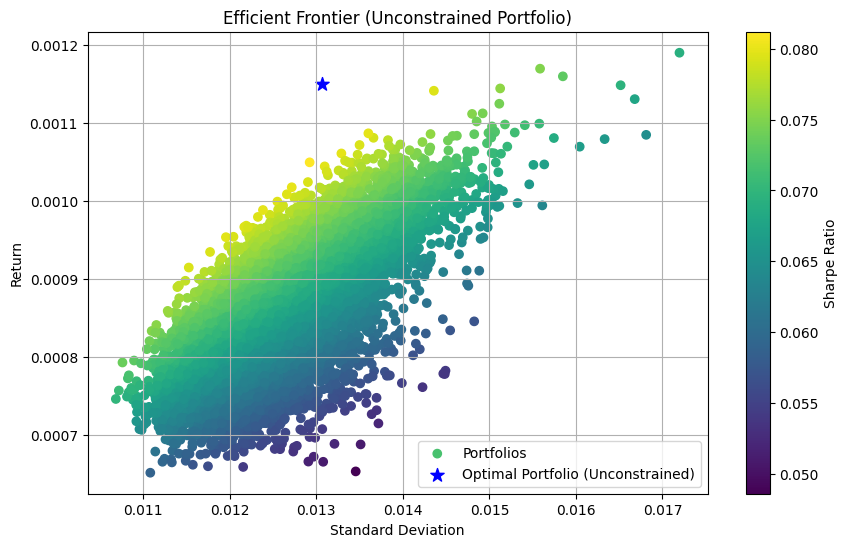

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming you have already loaded the 'returns3_df' DataFrame with daily returns

# Drop the duplicate 'Date' column from returns3_df (if not already dropped)
returns3_df.drop(columns='Date', inplace=True, errors='ignore')

# Calculate the summary statistics for the daily returns
daily_mean_returns = returns3_df.mean()
daily_cov_matrix = returns3_df.cov()

# Risk-free rate (Assuming it to be 0)
risk_free_rate = 0

# Number of stocks
num_stocks = len(returns3_df.columns)

# Define the objective function to maximize (Sharpe Ratio) for unconstrained portfolio
def sharpe_ratio_unconstrained(weights):
    portfolio_return = np.sum(weights * daily_mean_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(daily_cov_matrix, weights)))
    sharpe_ratio_value = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return -sharpe_ratio_value

# Define the constraint that the sum of weights should be equal to 1
constraint_sum_weights = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Perform the optimization to find the optimal unconstrained portfolio weights
result_unconstrained = minimize(sharpe_ratio_unconstrained, np.ones(num_stocks) / num_stocks,
                                method='SLSQP', constraints=constraint_sum_weights)

# Extract the optimal weights for the "optimal unconstrained portfolio" from the optimization result
optimal_weights_unconstrained = result_unconstrained.x

# Calculate the portfolio characteristics for the optimal unconstrained weights
optimal_return_unconstrained = np.sum(optimal_weights_unconstrained * daily_mean_returns)
optimal_std_dev_unconstrained = np.sqrt(np.dot(optimal_weights_unconstrained.T, np.dot(daily_cov_matrix, optimal_weights_unconstrained)))
optimal_sharpe_ratio_unconstrained = (optimal_return_unconstrained - risk_free_rate) / optimal_std_dev_unconstrained

# Print the optimal portfolio allocation (unconstrained)
print("\nOptimal Portfolio Allocation (Unconstrained Portfolio):")
for stock, weight in zip(returns3_df.columns, optimal_weights_unconstrained):
    print(f"{stock} weight: {weight:.5f}")
print(f"Return: {optimal_return_unconstrained:.5f}")
print(f"Std_Dev: {optimal_std_dev_unconstrained:.5f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio_unconstrained:.5f}")

# Generate random portfolio weights to create the efficient frontier for unconstrained portfolio
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, num_stocks))
ret_arr = np.zeros(num_portfolios)
std_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for i in range(num_portfolios):
    # Generate random weights for the portfolio that sum up to 1
    weights = np.random.uniform(0, 1, num_stocks)
    weights /= np.sum(weights)
    all_weights[i, :] = weights

    ret_arr[i] = np.sum(weights * daily_mean_returns)
    std_arr[i] = np.sqrt(np.dot(weights.T, np.dot(daily_cov_matrix, weights)))
    sharpe_arr[i] = (ret_arr[i] - risk_free_rate) / std_arr[i]

# Plot the efficient frontier for unconstrained portfolio
plt.figure(figsize=(10, 6))
plt.scatter(std_arr, ret_arr, c=sharpe_arr, marker='o', cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_std_dev_unconstrained, optimal_return_unconstrained, color='blue', marker='*', s=100, label='Optimal Portfolio (Unconstrained)')
plt.xlabel('Standard Deviation')
plt.ylabel('Return')
plt.title('Efficient Frontier (Unconstrained Portfolio)')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Combine all the DataFrames into a single DataFrame, CAPM_returns_df
CAPM_returns_df = pd.DataFrame(index=df_aapl.index)
CAPM_returns_df['Date'] = df_aapl.index
CAPM_returns_df['AAPL'] = df_aapl['AAPL']
CAPM_returns_df['MSFT'] = df_msft['MSFT']
CAPM_returns_df['WFC'] = df_wfc['WFC']
CAPM_returns_df['DIS'] = df_dis['DIS']
CAPM_returns_df['COP'] = df_cop['COP']
CAPM_returns_df['XOM'] = df_xom['XOM']
CAPM_returns_df['GOOG'] = df_goog['GOOG']
CAPM_returns_df['BIDU'] = df_bidu['BIDU']
CAPM_returns_df['TSLA'] = df_tsla['TSLA']
CAPM_returns_df['TTM'] = df_ttm['TTM']
CAPM_returns_df['DJI'] = df_dji['DJI']

# Set the 'Date' column as the index
CAPM_returns_df.set_index('Date', inplace=True)

# Drop the duplicate 'Date' column from the DataFrame (if it exists)
if 'Date' in CAPM_returns_df.columns:
    CAPM_returns_df.drop(columns='Date', inplace=True)

print([CAPM_returns_df])

[                AAPL      MSFT       WFC       DIS       COP       XOM  \
Date                                                                     
2010-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
2010-07-01 -0.012126  0.006519 -0.016406 -0.000317 -0.004482 -0.008060   
2010-07-02 -0.006198  0.004750 -0.011914 -0.003493 -0.001023 -0.000707   
2010-07-06  0.006844  0.023636  0.010852  0.010835  0.007784  0.015733   
2010-07-07  0.040381  0.020151  0.060040  0.044767  0.039838  0.016881   
...              ...       ...       ...       ...       ...       ...   
2016-06-24 -0.028096 -0.040069 -0.045919 -0.033327 -0.053912 -0.026253   
2016-06-27 -0.014561 -0.028096 -0.015314 -0.013999 -0.055363 -0.005929   
2016-06-28  0.016840  0.020855  0.024217  0.017694  0.028691  0.023070   
2016-06-29  0.008655  0.022249  0.018872  0.009682  0.046722  0.017050   
2016-06-30  0.012712  0.012465  0.007664  0.008662 -0.007060  0.013844   

                GOOG      BIDU      



---


#Section 3: Capital Asset Pricing Model (CAPM)


---



## Calculating Alphas and Betas



In [44]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming 'Date' is already set as the index. If not, you can set it using:
# CAPM_returns_df.set_index('Date', inplace=True)

# Calculate the risk-free rate (Assuming it to be 0)
risk_free_rate = 0

alpha_values = []
beta_values = []

# Extract the market returns (DJI) from the DataFrame
market_returns = CAPM_returns_df['DJI'].values  # Convert to NumPy array

# Perform the regression analysis
for column in CAPM_returns_df.columns:
    stock_returns = CAPM_returns_df[column].values  # Convert to NumPy array

    # Remove NaN values from both market_returns and stock_returns
    valid_mask = ~np.isnan(market_returns) & ~np.isnan(stock_returns)
    market_returns_valid = market_returns[valid_mask]
    stock_returns_valid = stock_returns[valid_mask]

    # Perform the regression analysis using scipy's linregress
    slope, intercept, _, _, _ = stats.linregress(market_returns_valid, stock_returns_valid)
    alpha_values.append(intercept)
    beta_values.append(slope)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Alpha': alpha_values, 'Beta': beta_values}, index=CAPM_returns_df.columns)

# Print the results
print("Alpha (Intercept):")
print(results_df['Alpha'])

print("\nBeta Loadings for Each Security:")
print(results_df['Beta'])


Alpha (Intercept):
AAPL    0.000440
MSFT    0.000284
WFC     0.000032
DIS     0.000397
COP    -0.000115
XOM     0.000061
GOOG    0.000447
BIDU    0.000316
TSLA    0.001479
TTM     0.000153
DJI     0.000000
Name: Alpha, dtype: float64

Beta Loadings for Each Security:
AAPL    0.900086
MSFT    1.043490
WFC     1.339708
DIS     1.129571
COP     1.168596
XOM     1.015141
GOOG    0.972718
BIDU    1.312206
TSLA    1.239124
TTM     1.492761
DJI     1.000000
Name: Beta, dtype: float64


## Comparing Alphas and Betas

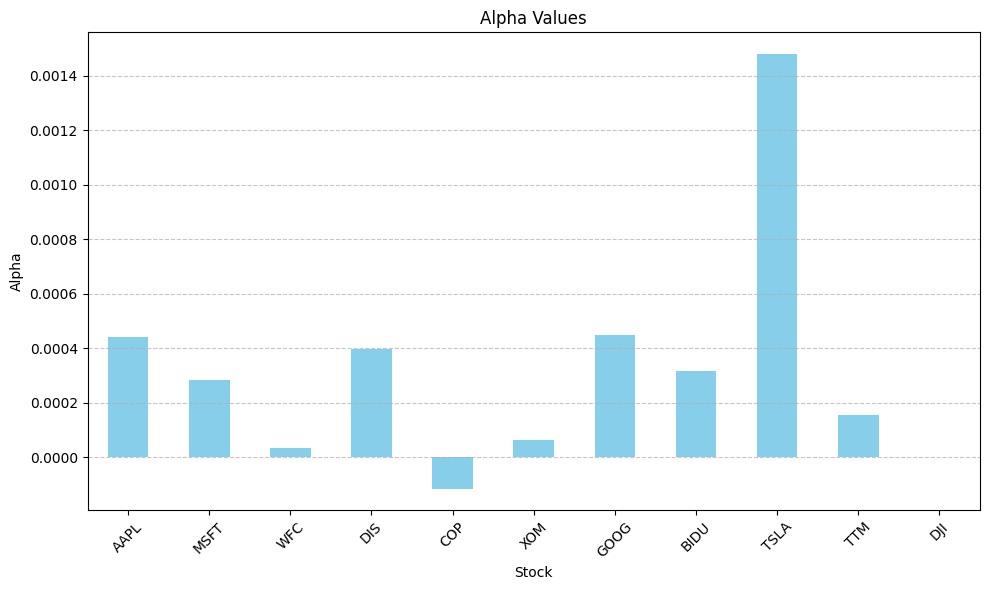

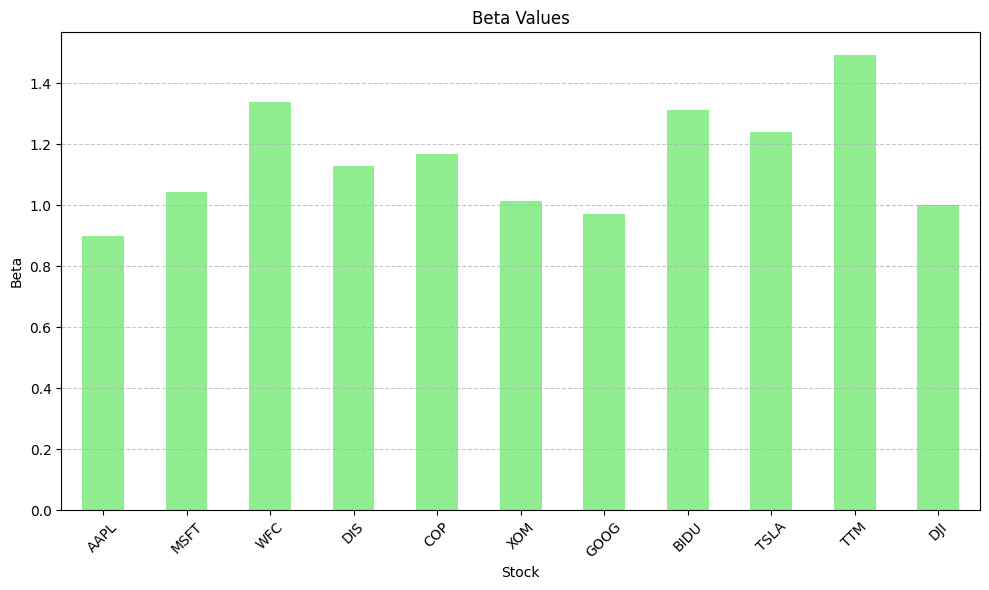

In [45]:

# Create a bar chart to visualize the Alpha values for each stock
plt.figure(figsize=(10, 6))
results_df['Alpha'].plot(kind='bar', color='skyblue')
plt.xlabel('Stock')
plt.ylabel('Alpha')
plt.title('Alpha Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a bar chart to visualize the Beta values for each stock
plt.figure(figsize=(10, 6))
results_df['Beta'].plot(kind='bar', color='lightgreen')
plt.xlabel('Stock')
plt.ylabel('Beta')
plt.title('Beta Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## CAPM Analysis

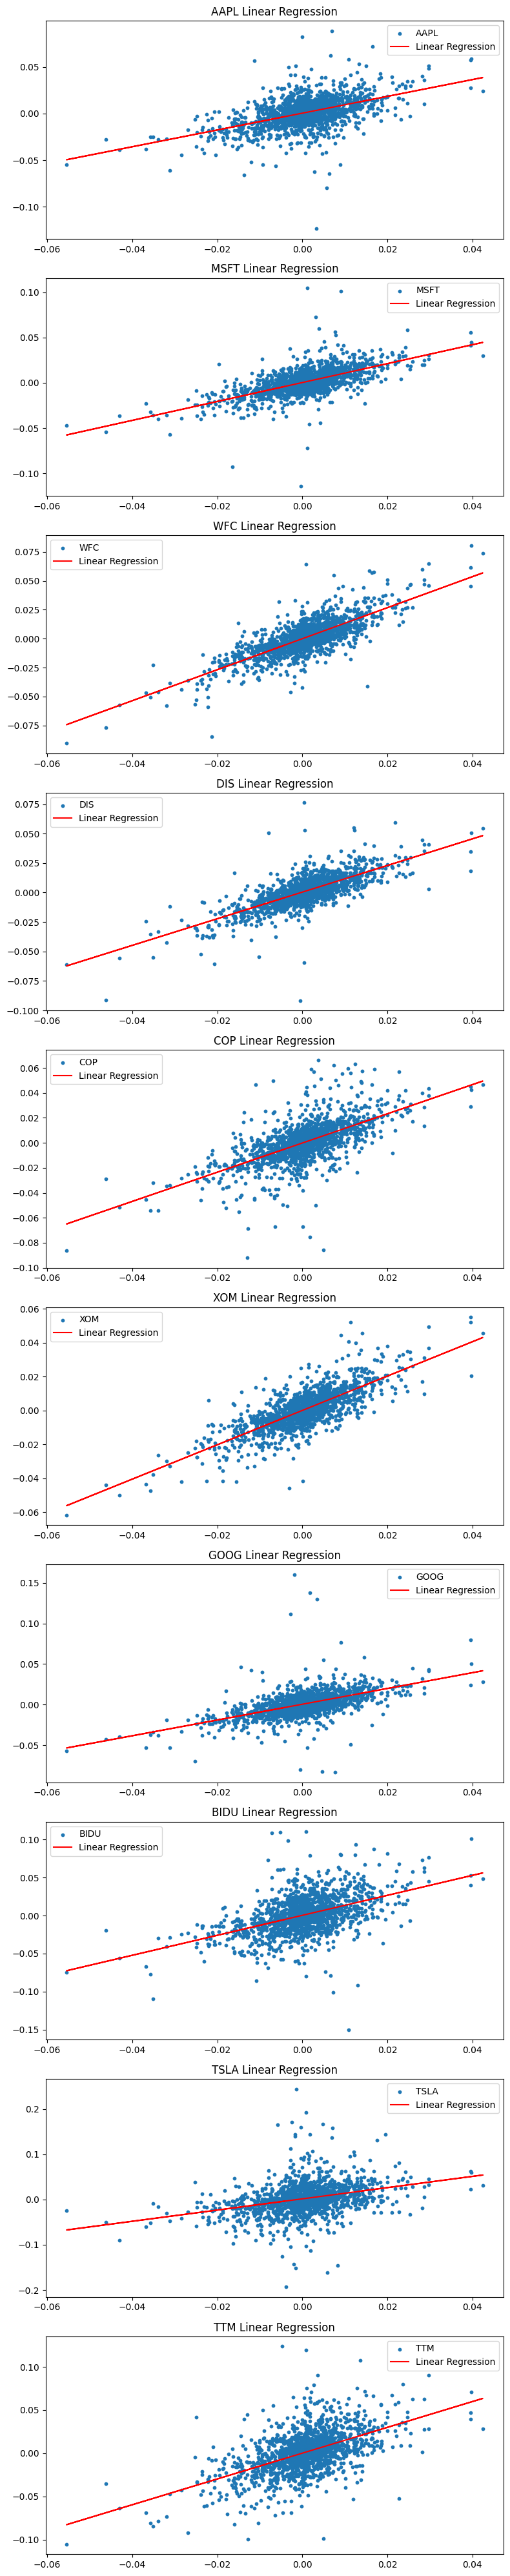

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'Date' is already set as the index. If not, you can set it using:
# CAPM_returns_df.set_index('Date', inplace=True)

# Calculate the risk-free rate (Assuming it to be 0)
risk_free_rate = 0

alpha_values = []
beta_values = []

# Extract the market returns (DJI) from the DataFrame
market_returns = CAPM_returns_df['DJI'].values  # Convert to NumPy array

# Create separate plots for each stock
fig, axes = plt.subplots(nrows=len(CAPM_returns_df.columns) - 1, ncols=1, figsize=(8, 4 * (len(CAPM_returns_df.columns) - 1)))

for i, column in enumerate(CAPM_returns_df.columns[:-1]):  # Exclude the 'DJI' column
    stock_returns = CAPM_returns_df[column].values  # Convert to NumPy array

    # Remove NaN values from both market_returns and stock_returns
    valid_mask = ~np.isnan(market_returns) & ~np.isnan(stock_returns)
    market_returns_valid = market_returns[valid_mask]
    stock_returns_valid = stock_returns[valid_mask]

    # Perform the regression analysis using scipy's linregress
    slope, intercept, _, _, _ = stats.linregress(market_returns_valid, stock_returns_valid)
    alpha_values.append(intercept)
    beta_values.append(slope)

    # Create the linear regression line
    line = slope * market_returns_valid + intercept

    # Plot the scatter plot and linear regression line
    axes[i].scatter(market_returns_valid, stock_returns_valid, s=10, label=column)
    axes[i].plot(market_returns_valid, line, color='red', label='Linear Regression')
    axes[i].set_title(f'{column} Linear Regression')
    axes[i].legend()

plt.tight_layout()
plt.show()




---


# Section 4: Mixed Asset Portfolio


---



## Importing Data for VBTLX and VFIAX Funds


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data for VBTLX (bonds) and VFIAX (equity) as monthly returns
data = {
    'Date': ['Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12',
             'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13',
             'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14',
             'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15'],
    'VBTLX': [0.0088, -0.0004, -0.0057, 0.0115, 0.0096, 0.0004, 0.0139, 0.0004, 0.0012, 0.0012, 0.0020, -0.0019, -0.0070, 0.0055,
              0.0009, 0.0092, -0.0170, -0.0164, 0.0021, -0.0063, 0.0097, 0.0079, -0.0034, -0.0064, 0.0155, 0.0049, -0.0014, 0.0078,
              0.0106, 0.0012, -0.0025, 0.0114, -0.0071, 0.0095, 0.0066, 0.0010, 0.0232, -0.0107, 0.0042, -0.0035, -0.0044, -0.0100,
              0.0077, -0.0035, 0.0076, 0.0002, -0.0037, -0.0026],
    'VFIAX': [0.0447, 0.0432, 0.0329, -0.0063, -0.0601, 0.0412, 0.0138, 0.0225, 0.0258, -0.0185, 0.0058, 0.0091, 0.0518, 0.0135,
              0.0375, 0.0192, 0.0233, -0.0135, 0.0509, -0.0290, 0.0313, 0.0459, 0.0304, 0.0253, -0.0346, 0.0457, 0.0084, 0.0084,
              0.0234, 0.0206, -0.0138, 0.0400, -0.0140, 0.0243, 0.0269, -0.0026, -0.0300, 0.0574, -0.0159, 0.0095, 0.0128, -0.0192,
              0.0209, -0.0604, -0.0248, 0.0843, 0.0030, -0.0158]
}

# Create a DataFrame from the data
returns5_df = pd.DataFrame(data)

# Convert Date column to pandas datetime format
returns5_df['Date'] = pd.to_datetime(returns5_df['Date'], format='%b-%y')

# Set the Date column as the DataFrame index
returns5_df.set_index('Date', inplace=True)

# Display the DataFrame
print(returns5_df)


             VBTLX   VFIAX
Date                      
2012-01-01  0.0088  0.0447
2012-02-01 -0.0004  0.0432
2012-03-01 -0.0057  0.0329
2012-04-01  0.0115 -0.0063
2012-05-01  0.0096 -0.0601
2012-06-01  0.0004  0.0412
2012-07-01  0.0139  0.0138
2012-08-01  0.0004  0.0225
2012-09-01  0.0012  0.0258
2012-10-01  0.0012 -0.0185
2012-11-01  0.0020  0.0058
2012-12-01 -0.0019  0.0091
2013-01-01 -0.0070  0.0518
2013-02-01  0.0055  0.0135
2013-03-01  0.0009  0.0375
2013-04-01  0.0092  0.0192
2013-05-01 -0.0170  0.0233
2013-06-01 -0.0164 -0.0135
2013-07-01  0.0021  0.0509
2013-08-01 -0.0063 -0.0290
2013-09-01  0.0097  0.0313
2013-10-01  0.0079  0.0459
2013-11-01 -0.0034  0.0304
2013-12-01 -0.0064  0.0253
2014-01-01  0.0155 -0.0346
2014-02-01  0.0049  0.0457
2014-03-01 -0.0014  0.0084
2014-04-01  0.0078  0.0084
2014-05-01  0.0106  0.0234
2014-06-01  0.0012  0.0206
2014-07-01 -0.0025 -0.0138
2014-08-01  0.0114  0.0400
2014-09-01 -0.0071 -0.0140
2014-10-01  0.0095  0.0243
2014-11-01  0.0066  0.0269
2

Optimal Allocation of Mixed Asset Portfolio

Optimal Portfolio Allocation:
Weight of VBTLX (Bonds): 0.6785
Weight of VFIAX (Equity): 0.3215


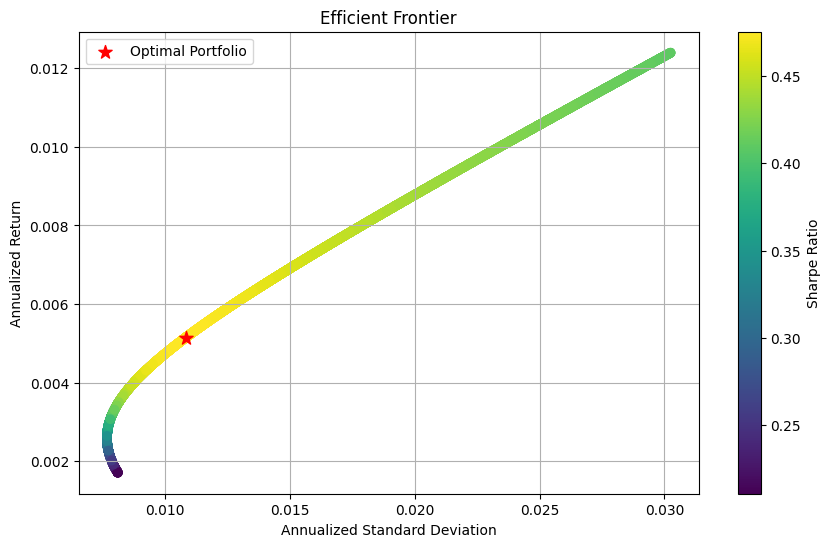

In [48]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Data for VBTLX (bonds) and VFIAX (equity) as monthly returns
data = {
    'Date': ['Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12',
             'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13',
             'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14',
             'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15'],
    'VBTLX': [0.0088, -0.0004, -0.0057, 0.0115, 0.0096, 0.0004, 0.0139, 0.0004, 0.0012, 0.0012, 0.0020, -0.0019, -0.0070, 0.0055,
              0.0009, 0.0092, -0.0170, -0.0164, 0.0021, -0.0063, 0.0097, 0.0079, -0.0034, -0.0064, 0.0155, 0.0049, -0.0014, 0.0078,
              0.0106, 0.0012, -0.0025, 0.0114, -0.0071, 0.0095, 0.0066, 0.0010, 0.0232, -0.0107, 0.0042, -0.0035, -0.0044, -0.0100,
              0.0077, -0.0035, 0.0076, 0.0002, -0.0037, -0.0026],
    'VFIAX': [0.0447, 0.0432, 0.0329, -0.0063, -0.0601, 0.0412, 0.0138, 0.0225, 0.0258, -0.0185, 0.0058, 0.0091, 0.0518, 0.0135,
              0.0375, 0.0192, 0.0233, -0.0135, 0.0509, -0.0290, 0.0313, 0.0459, 0.0304, 0.0253, -0.0346, 0.0457, 0.0084, 0.0084,
              0.0234, 0.0206, -0.0138, 0.0400, -0.0140, 0.0243, 0.0269, -0.0026, -0.0300, 0.0574, -0.0159, 0.0095, 0.0128, -0.0192,
              0.0209, -0.0604, -0.0248, 0.0843, 0.0030, -0.0158]
}

# Create a DataFrame from the data
returns5_df = pd.DataFrame(data)

# Convert Date column to pandas datetime format
returns5_df['Date'] = pd.to_datetime(returns5_df['Date'], format='%b-%y')

# Set the Date column as the DataFrame index
returns5_df.set_index('Date', inplace=True)

# Calculate expected returns and covariance matrix
expected_returns = returns5_df.mean()
cov_matrix = returns5_df.cov()

# Monte Carlo Simulation to generate random portfolios
num_portfolios = 10000
results = np.zeros((5, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)

    portfolio_return = np.sum(expected_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    portfolio_sharpe_ratio = portfolio_return / portfolio_std_dev

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std_dev
    results[2, i] = portfolio_sharpe_ratio
    results[3, i] = weights[0]  # Weight of VBTLX (bonds)
    results[4, i] = weights[1]  # Weight of VFIAX (equity)

# Find the row with the maximum Sharpe ratio (optimal portfolio)
max_sharpe_idx = np.argmax(results[2])
optimal_portfolio = results[:, max_sharpe_idx]

# Print the optimal portfolio allocation
print("Optimal Portfolio Allocation:")
print(f"Weight of VBTLX (Bonds): {optimal_portfolio[3]:.4f}")
print(f"Weight of VFIAX (Equity): {optimal_portfolio[4]:.4f}")

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1], results[0], c=results[2], marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(optimal_portfolio[1], optimal_portfolio[0], color='red', marker='*', s=100, label='Optimal Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()


##Portfolio Return

In [116]:
import pandas as pd
import yfinance as yf

# Define the ticker symbols
tickers = ['VBTLX', 'VFIAX']

# Define the date range from January 2012 to December 2015
start_date = '2015-12-31'
end_date = '2016-08-01'

# Fetch the data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate monthly returns
returns6_df = data.resample('M').ffill().pct_change()

# Save the data to a CSV file
returns6_df.to_csv('monthly_returns.csv')

print(returns6_df)


import pandas as pd
import numpy as np

# Read the data from the CSV file
returns6_df = pd.read_csv('monthly_returns.csv', parse_dates=['Date'], index_col='Date')

# Calculate the optimal portfolio weights as of the end of December 2015 (from Step 5.1)
optimal_portfolio_weights = [0.6785, 0.3215]

# Calculate the portfolio returns for the period from January 2016 to July 2016
returns_2016 = returns6_df.loc['2016-01':'2016-07']
portfolio_returns_2016 = (returns_2016 * optimal_portfolio_weights).sum(axis=1)
portfolio_returns_2016 = portfolio_returns_2016.dropna()

# Calculate the final portfolio value at the end of July 2016
initial_portfolio_value_2016 = 5000000
final_portfolio_value_2016 = initial_portfolio_value_2016 * (1 + portfolio_returns_2016).prod()

# Print the results
print("\nPortfolio Monthly Returns for 2016:")
print(portfolio_returns_2016)
print(f"\nFinal Portfolio Value at the End of July 2016: ${final_portfolio_value_2016:.2f}")


[*********************100%***********************]  2 of 2 completed
               VBTLX     VFIAX
Date                          
2015-12-31       NaN       NaN
2016-01-31  0.014391 -0.049661
2016-02-29  0.006690 -0.001396
2016-03-31  0.009528  0.067843
2016-04-30  0.003857  0.003895
2016-05-31  0.000283  0.017880
2016-06-30  0.019457  0.002587
2016-07-31  0.006501  0.036817

Portfolio Monthly Returns for 2016:
Date
2016-01-31   -0.006201
2016-02-29    0.004091
2016-03-31    0.028276
2016-04-30    0.003869
2016-05-31    0.005940
2016-06-30    0.014034
2016-07-31    0.016248
dtype: float64

Final Portfolio Value at the End of July 2016: $5338909.38


### Portfolio Value Graph

[*********************100%***********************]  2 of 2 completed

Portfolio Cumulative Returns for 2016:
Date
2016-01-04    0.996431
2016-01-05    0.996436
2016-01-06    0.994893
2016-01-07    0.987948
2016-01-08    0.985764
                ...   
2016-07-25    1.062488
2016-07-26    1.062607
2016-07-27    1.064801
2016-07-28    1.064733
2016-07-29    1.068685
Length: 145, dtype: float64

Final Portfolio Value at the End of July 2016: $5338910.55


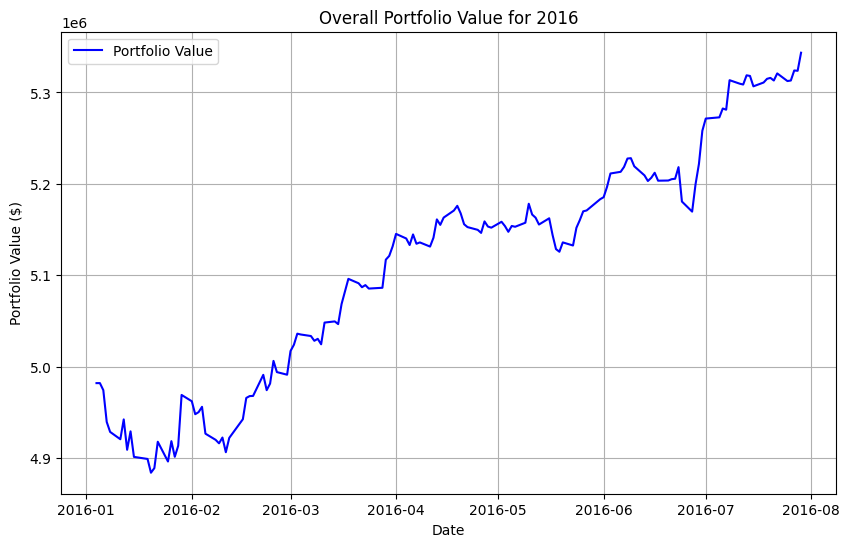

In [141]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols
tickers = ['VBTLX', 'VFIAX']

# Define the date range from January 2016 to July 2016
start_date = '2015-12-31'
end_date = '2016-08-01'

# Fetch the data from Yahoo Finance with daily interval
data = yf.download(tickers, start=start_date, end=end_date, interval='1d')['Adj Close']

# Calculate daily returns
returns_data = data.pct_change().dropna()

# Calculate the optimal portfolio weights as of the end of December 2015
optimal_portfolio_weights = [0.6785, 0.3215]

# Calculate the portfolio returns for the period from January 2016 to July 2016
returns_2016 = returns_data.loc['2016-01-01':'2016-07-31']
portfolio_returns_2016 = (returns_2016 * optimal_portfolio_weights).sum(axis=1)
portfolio_returns_2016 = portfolio_returns_2016.dropna()

# Calculate the cumulative portfolio returns and the portfolio value
cumulative_returns_2016 = (1 + portfolio_returns_2016).cumprod()
portfolio_value_2016 = initial_portfolio_value_2016 * cumulative_returns_2016

# Print the results
print("\nPortfolio Cumulative Returns for 2016:")
print(cumulative_returns_2016)
print(f"\nFinal Portfolio Value at the End of July 2016: ${final_portfolio_value_2016:.2f}")

# Plot the overall portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_2016.index, portfolio_value_2016, label='Portfolio Value', color='blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.title('Overall Portfolio Value for 2016')
plt.legend()
plt.grid(True)
plt.show()



### Monthly Return Chart

[*********************100%***********************]  2 of 2 completed

Portfolio Monthly Returns for 2016:
Date
2016-01-31   -0.006202
2016-02-29    0.004091
2016-03-31    0.028276
2016-04-30    0.003870
2016-05-31    0.005940
2016-06-30    0.014033
2016-07-31    0.016248
dtype: float64

Final Portfolio Value at the End of July 2016: $5338908.73


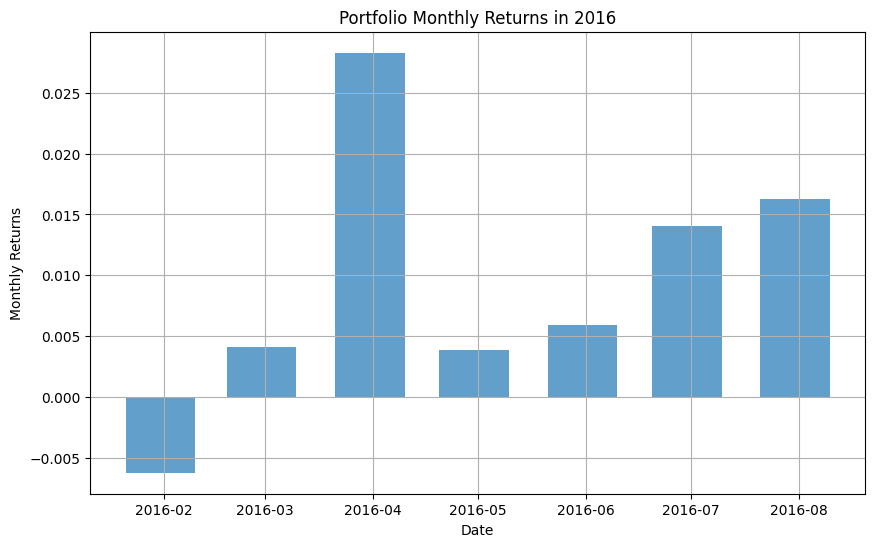

In [120]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbols
tickers = ['VBTLX', 'VFIAX']

# Define the date range from January 2012 to December 2015
start_date = '2015-12-31'
end_date = '2016-08-01'

# Fetch the data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate monthly returns
returns6_df = data.resample('M').ffill().pct_change()

# Save the data to a CSV file
returns6_df.to_csv('monthly_returns.csv')

# Read the data from the CSV file
returns6_df = pd.read_csv('monthly_returns.csv', parse_dates=['Date'], index_col='Date')

# Calculate the optimal portfolio weights as of the end of December 2015 (from Step 5.1)
optimal_portfolio_weights = [0.6785, 0.3215]

# Calculate the portfolio returns for the period from January 2016 to July 2016
returns_2016 = returns6_df.loc['2016-01':'2016-07']
portfolio_returns_2016 = (returns_2016 * optimal_portfolio_weights).sum(axis=1)
portfolio_returns_2016 = portfolio_returns_2016.dropna()

# Calculate the final portfolio value at the end of July 2016
initial_portfolio_value_2016 = 5000000
final_portfolio_value_2016 = initial_portfolio_value_2016 * (1 + portfolio_returns_2016).prod()

# Print the results
print("\nPortfolio Monthly Returns for 2016:")
print(portfolio_returns_2016)
print(f"\nFinal Portfolio Value at the End of July 2016: ${final_portfolio_value_2016:.2f}")

# Plot the portfolio monthly returns as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(portfolio_returns_2016.index, portfolio_returns_2016, width=20, align='center', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Monthly Returns')
plt.title('Portfolio Monthly Returns in 2016')
plt.grid(True)
plt.show()


### Monthly Return per Fund Chart

[*********************100%***********************]  2 of 2 completed


<ipython-input-75-90cf11aebcf8>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.1%}' for x in ax.get_yticks()])


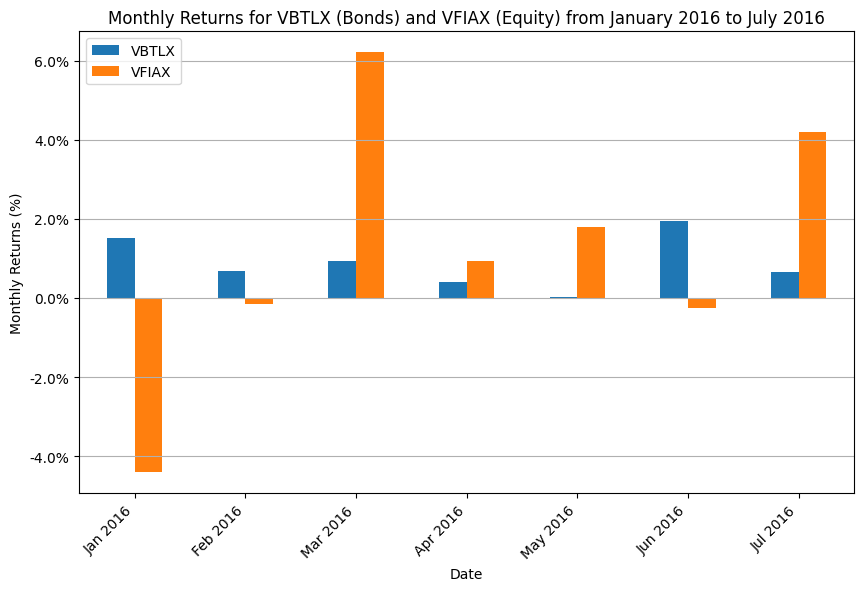

In [75]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for the two funds
tickers = ['VBTLX', 'VFIAX']

# Define the date range from January 2016 to July 2016
start_date = '2015-12-01'
end_date = '2016-07-31'

# Get the historical monthly returns data for the two funds from Yahoo Finance
returns_data = yf.download(tickers, start=start_date, end=end_date, interval='1mo')['Adj Close'].pct_change().dropna()

# Plot the monthly returns as a bar plot
plt.figure(figsize=(10, 6))
ax = returns_data.plot(kind='bar', ax=plt.gca())
plt.xlabel('Date')
plt.ylabel('Monthly Returns (%)')
plt.title('Monthly Returns for VBTLX (Bonds) and VFIAX (Equity) from January 2016 to July 2016')
plt.grid(axis='y')
plt.legend(loc='upper left')

# Format x-axis tick labels
ax.set_xticklabels(returns_data.index.strftime('%b %Y'), rotation=45, ha='right')

# Add units to y-axis labels
ax.set_yticklabels([f'{x:.1%}' for x in ax.get_yticks()])

plt.show()


## Mixed Portfolio vs AAPL

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


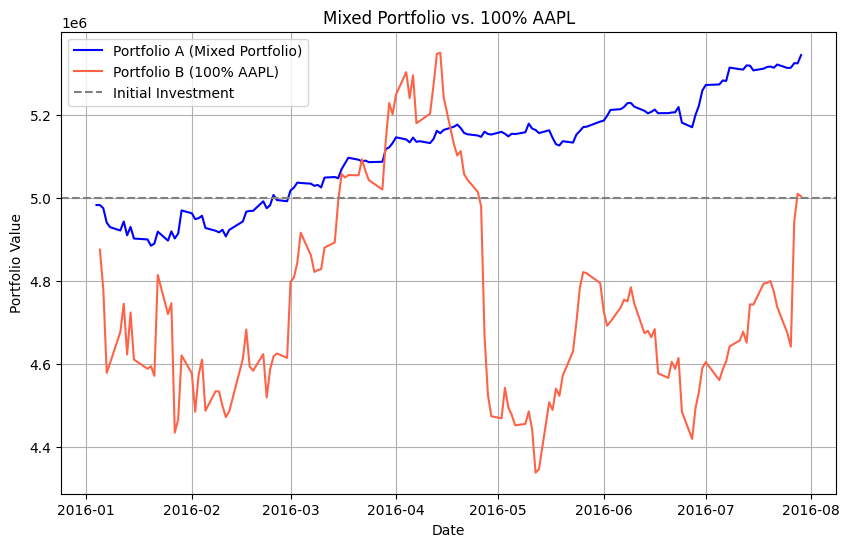

In [100]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers for the two funds
tickers = ['VBTLX', 'VFIAX']

# Define the date range from January 2012 to July 2016
start_date = '2012-01-01'
end_date = '2016-07-31'

# Get the historical monthly returns data for the two funds from Yahoo Finance
returns_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()

# Calculate the optimal portfolio weights as of the end of December 2015
optimal_portfolio_weights = [0.6785, 0.3215]  # You can replace this with the actual optimal weights from Step 5.1

# Calculate the portfolio returns for the period from January 2016 to July 2016
portfolio_returns = (returns_data * optimal_portfolio_weights).sum(axis=1)
portfolio_returns = portfolio_returns.loc['2016-01-01':'2016-07-31']  # Filter data for the specified date range

# Calculate the portfolio value at each month for the mixed portfolio
initial_investment = 5000000  # $5 million initial investment
portfolio_value_mixed = (portfolio_returns + 1).cumprod() * initial_investment

# Fetch AAPL data for comparison
aapl_ticker = 'AAPL'
data_aapl = yf.download(aapl_ticker, start='2016-01-01', end='2016-07-31')['Adj Close'].pct_change().dropna()

# Calculate the portfolio value at each month for the 100% AAPL portfolio
portfolio_returns_aapl = (data_aapl + 1).cumprod() * initial_investment

# Plot the portfolio values over time for both portfolios
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value_mixed, color='blue', label='Portfolio A (Mixed Portfolio)')
plt.plot(portfolio_returns_aapl, color='tomato', label='Portfolio B (100% AAPL)')
plt.axhline(y=initial_investment, color='grey', linestyle='--', label='Initial Investment')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Mixed Portfolio vs. 100% AAPL')
plt.legend()
plt.grid(True)
plt.show()

